In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
import re
import pandas as pd
import numpy as np
import emoji
from emoji import demojize

ModuleNotFoundError: No module named 'transformers'

In [ ]:
df= pd.read_csv('train.csv')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
494,0,1467934606,Mon Apr 06 22:53:06 PDT 2009,NO_QUERY,fictillius,@Brodhe geez ur no fun are you
495,0,1467935121,Mon Apr 06 22:53:14 PDT 2009,NO_QUERY,SicklyInfected,I wanna be in a punk rock band again
496,0,1467935189,Mon Apr 06 22:53:15 PDT 2009,NO_QUERY,AshleighF,@jyesmith That's a lot of angst for a Tuesday ...
497,0,1467935271,Mon Apr 06 22:53:19 PDT 2009,NO_QUERY,andreakuefler,I'm very glad Britney isn't crazy anymore! Tha...


In [ ]:
column_names = ['nu,', 'val', 'date', 'query', 'ID', 'tweet']

df = pd.read_csv('train.csv', header=None, names=column_names)
df

,"nu,",val,date,query,ID,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
495,0,1467934606,Mon Apr 06 22:53:06 PDT 2009,NO_QUERY,fictillius,@Brodhe geez ur no fun are you
496,0,1467935121,Mon Apr 06 22:53:14 PDT 2009,NO_QUERY,SicklyInfected,I wanna be in a punk rock band again
497,0,1467935189,Mon Apr 06 22:53:15 PDT 2009,NO_QUERY,AshleighF,@jyesmith That's a lot of angst for a Tuesday ...
498,0,1467935271,Mon Apr 06 22:53:19 PDT 2009,NO_QUERY,andreakuefler,I'm very glad Britney isn't crazy anymore! Tha...


In [ ]:
df= df[['date', 'tweet']]
df

,date,tweet
0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
...,...,...
495,Mon Apr 06 22:53:06 PDT 2009,@Brodhe geez ur no fun are you
496,Mon Apr 06 22:53:14 PDT 2009,I wanna be in a punk rock band again
497,Mon Apr 06 22:53:15 PDT 2009,@jyesmith That's a lot of angst for a Tuesday ...
498,Mon Apr 06 22:53:19 PDT 2009,I'm very glad Britney isn't crazy anymore! Tha...


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    results = model(tokens)
    return int(torch.argmax(results.logits))+1

In [ ]:
for i in range(len(df)):  
    if(any(char in emoji.EMOJI_DATA for char in df['tweet'])):
        df['tweet'] =demojize(df['tweet'].iloc)

In [ ]:
df['Sentiments_val'] = df['tweet'].apply(lambda x: sentiment_score(" ".join(x)[:512]) if isinstance(x, list) else sentiment_score(x[:512]))


C:\Users\nikhi\AppData\Local\Temp\ipykernel_7992\81960396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiments_val'] = df['tweet'].apply(lambda x: sentiment_score(" ".join(x)[:512]) if isinstance(x, list) else sentiment_score(x[:512]))


In [ ]:
df

,date,tweet,Sentiments_val
0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,1
2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,1
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,2
4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",1
...,...,...,...
495,Mon Apr 06 22:53:06 PDT 2009,@Brodhe geez ur no fun are you,1
496,Mon Apr 06 22:53:14 PDT 2009,I wanna be in a punk rock band again,5
497,Mon Apr 06 22:53:15 PDT 2009,@jyesmith That's a lot of angst for a Tuesday ...,1
498,Mon Apr 06 22:53:19 PDT 2009,I'm very glad Britney isn't crazy anymore! Tha...,5


In [ ]:
for i in range(len(df)):  
    if df['Sentiments_val'].iloc[i] > 3:
        df.at[i, 'Sentiments'] = "Positive"
    elif df['Sentiments_val'].iloc[i] < 3:
        df.at[i, 'Sentiments'] = "Negative"
    elif df['Sentiments_val'].iloc[i] == 3:
        df.at[i, 'Sentiments'] = "Neutral"

df

C:\Users\nikhi\AppData\Local\Temp\ipykernel_7992\1990185276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[i, 'Sentiments'] = "Negative"


,date,tweet,Sentiments_val,Sentiments
0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,Negative
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,1,Negative
2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,1,Negative
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,2,Negative
4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",1,Negative
...,...,...,...,...
495,Mon Apr 06 22:53:06 PDT 2009,@Brodhe geez ur no fun are you,1,Negative
496,Mon Apr 06 22:53:14 PDT 2009,I wanna be in a punk rock band again,5,Positive
497,Mon Apr 06 22:53:15 PDT 2009,@jyesmith That's a lot of angst for a Tuesday ...,1,Negative
498,Mon Apr 06 22:53:19 PDT 2009,I'm very glad Britney isn't crazy anymore! Tha...,5,Positive


In [ ]:
print(df['Sentiments_val'].value_counts())

Sentiments_val
1    265
2     77
5     72
3     69
4     17
Name: count, dtype: int64


In [ ]:
df

,date,tweet,Sentiments_val,Sentiments
0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,Negative
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,1,Negative
2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,1,Negative
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,2,Negative
4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",1,Negative
...,...,...,...,...
495,Mon Apr 06 22:53:06 PDT 2009,@Brodhe geez ur no fun are you,1,Negative
496,Mon Apr 06 22:53:14 PDT 2009,I wanna be in a punk rock band again,5,Positive
497,Mon Apr 06 22:53:15 PDT 2009,@jyesmith That's a lot of angst for a Tuesday ...,1,Negative
498,Mon Apr 06 22:53:19 PDT 2009,I'm very glad Britney isn't crazy anymore! Tha...,5,Positive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df['Sentiments'].value_counts())

Sentiments
Negative    342
Positive     89
Neutral      69
Name: count, dtype: int64


In [ ]:
df['timestamp'] = pd.to_datetime(df['date'])

df

C:\Users\nikhi\AppData\Local\Temp\ipykernel_7992\3062030512.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['timestamp'] = pd.to_datetime(df['date'])
C:\Users\nikhi\AppData\Local\Temp\ipykernel_7992\3062030512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['date'])


,date,tweet,Sentiments_val,Sentiments,timestamp
0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,Negative,2009-04-06 22:19:45
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,1,Negative,2009-04-06 22:19:49
2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,1,Negative,2009-04-06 22:19:53
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,2,Negative,2009-04-06 22:19:57
4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",1,Negative,2009-04-06 22:19:57
...,...,...,...,...,...
495,Mon Apr 06 22:53:06 PDT 2009,@Brodhe geez ur no fun are you,1,Negative,2009-04-06 22:53:06
496,Mon Apr 06 22:53:14 PDT 2009,I wanna be in a punk rock band again,5,Positive,2009-04-06 22:53:14
497,Mon Apr 06 22:53:15 PDT 2009,@jyesmith That's a lot of angst for a Tuesday ...,1,Negative,2009-04-06 22:53:15
498,Mon Apr 06 22:53:19 PDT 2009,I'm very glad Britney isn't crazy anymore! Tha...,5,Positive,2009-04-06 22:53:19


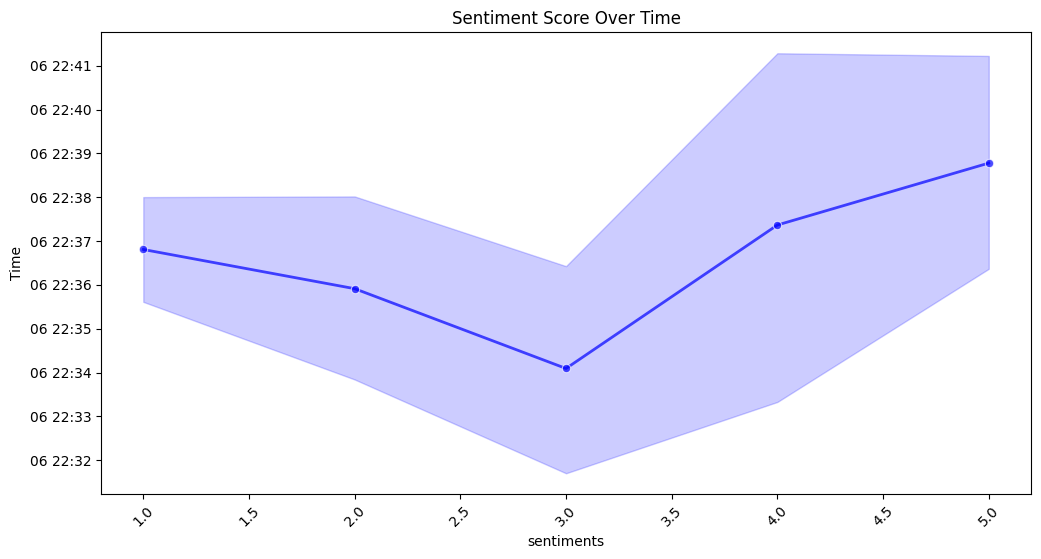

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Sentiments_val'], y=df['timestamp'], marker="o", linestyle="-", color="b", alpha=0.7, linewidth=2)
plt.xlabel("sentiments")
plt.ylabel("Time")
plt.title("Sentiment Score Over Time")
plt.xticks(rotation=45)
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_7992\491213543.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['timestamp'] = pd.to_datetime(df['date'])
C:\Users\nikhi\AppData\Local\Temp\ipykernel_7992\491213543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['date'])


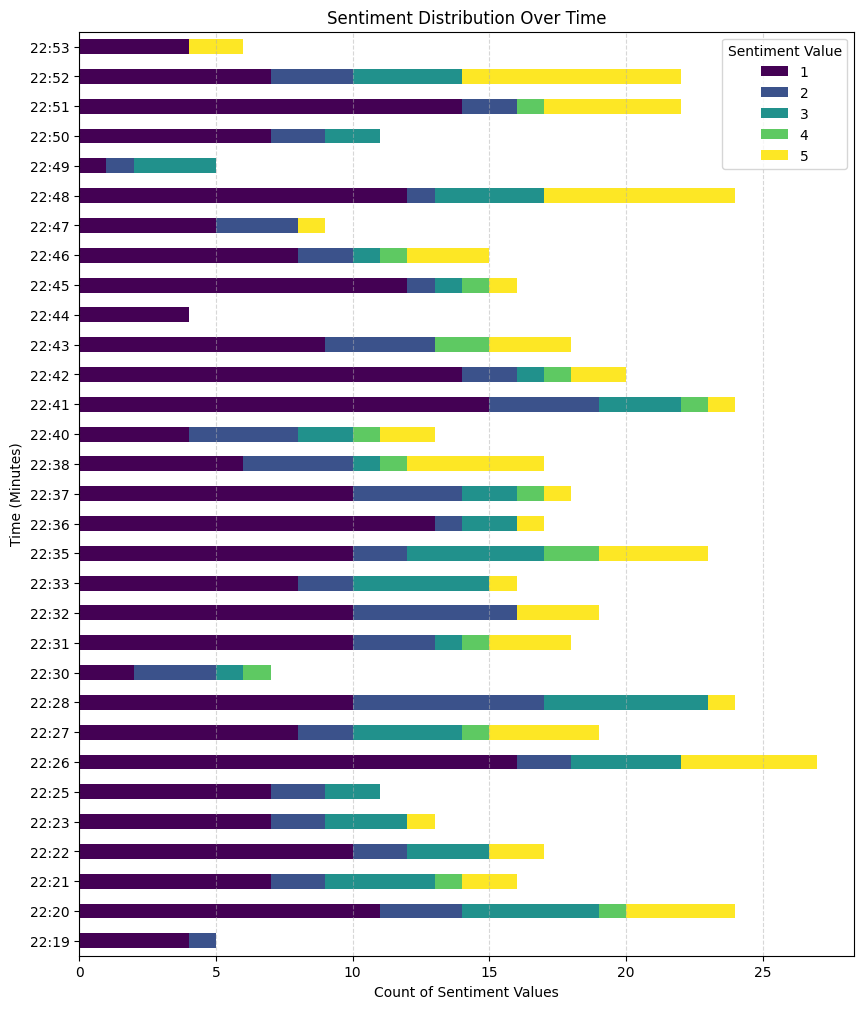

In [ ]:

df['timestamp'] = pd.to_datetime(df['date'])
df['minute'] = df['timestamp'].dt.strftime('%H:%M')

df_count = df.pivot_table(index='minute', columns='Sentiments_val', aggfunc='size', fill_value=0)
df_count.plot(kind='barh', stacked=True, figsize=(10, 12), colormap="viridis")

plt.ylabel("Time (Minutes)")
plt.xlabel("Count of Sentiment Values")
plt.title("Sentiment Distribution Over Time")
plt.legend(title="Sentiment Value", loc="upper right")
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


In [ ]:
df_count

Sentiments_val,1,2,3,4,5
minute,,,,,
22:19,4,1,0,0,0
22:20,11,3,5,1,4
22:21,7,2,4,1,2
22:22,10,2,3,0,2
22:23,7,2,3,0,1
22:25,7,2,2,0,0
22:26,16,2,4,0,5
22:27,8,2,4,1,4
22:28,10,7,6,0,1


In [ ]:
tokens = tokenizer.encode(demojize("Oh yay! Another error message. Just what I wanted!"), return_tensors='pt')
results = model(tokens)
int(torch.argmax(results.logits))+1

5

In [ ]:

tokens = tokenizer.encode("i need some break from this hectic college life man", return_tensors='pt')
results = model(tokens)
int(torch.argmax(results.logits))+1

1

In [ ]:
for i in range(len(df)):  
    if(any(char in emoji.EMOJI_DATA for char in df['tweet'])):
        df['tweet'] =demojize(df['tweet'].iloc)

In [ ]:
df['Sentiments_val'] = df['tweet'].apply(lambda x: sentiment_score(" ".join(x)[:512]) if isinstance(x, list) else sentiment_score(x[:512]))


In [ ]:
print(df['Sentiments'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      Negative
1      Negative
2      Negative
3      Negative
4      Negative
         ...   
495    Negative
496    Positive
497    Negative
498    Positive
499    Negative
Name: Sentiments, Length: 500, dtype: object>


In [ ]:
df['tweet'].loc[300]

NameError: name 'df' is not defined